In [1]:
import pylab as pl
import scipy as sp
import numpy as np
from scipy.io import loadmat
import pdb

In [2]:
def load_data(fname):
    # load the data
    data = loadmat(fname)
    # extract images and labels
    imgs = data['data_patterns']
    labels = data['data_labels']
    return imgs, labels

In [68]:
def perceptron_train(X,Y,Xtest,Ytest,iterations=100,eta=.1):
    # initialize accuracy vector
    acc = np.zeros(iterations)
    # initialize weight vector
    weights = np.full((256, ), 1/256) # it should add up to 256 (1/256, 1/256, etc.)
    # loop over iterations    
    for it in sp.arange(iterations):
        prediction = np.dot(weights.transpose(), X)
        # indices of misclassified data
        wrong_temp = np.sign(prediction) != Y
        wrong = np.where(wrong_temp == 1)[0]
        # check if there is misclassified data
        if wrong.shape[0] > 0:
            # pick a random misclassified data point
            rit = np.random.choice(wrong)
            # update weight vector
            weights += np.dot((eta/(it+1)), np.dot(X[:, rit], Y[rit]))
            # compute error
            test_pred = np.dot(weights.transpose(), Xtest) # (603, )
            correctAndNotCorrect = np.sign(test_pred) == Ytest
            totalCorrect = np.sum(correctAndNotCorrect)
            print(totalCorrect/Ytest.size)
            acc[it] = totalCorrect/Ytest.size

    # return weight vector and error
    return weights,acc

<ipython-input-70-3c236bdb0bae>:6: DeprecationWarning: scipy.sign is deprecated and will be removed in SciPy 2.0.0, use numpy.sign instead
  labels = sp.sign((labels[digit,:]>0)-.5)
<ipython-input-70-3c236bdb0bae>:9: DeprecationWarning: scipy.arange is deprecated and will be removed in SciPy 2.0.0, use numpy.arange instead
  permidx = sp.random.permutation(sp.arange(imgs.shape[-1])) #(2007, )
<ipython-input-70-3c236bdb0bae>:11: DeprecationWarning: scipy.floor is deprecated and will be removed in SciPy 2.0.0, use numpy.floor instead
  stopat = sp.floor(labels.shape[-1]*trainpercent/100.)
<ipython-input-68-8467a6e95ed8>:7: DeprecationWarning: scipy.arange is deprecated and will be removed in SciPy 2.0.0, use numpy.arange instead
  for it in sp.arange(iterations):
<ipython-input-70-3c236bdb0bae>:41: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  weights = sp.reshape(w,(int(sp.sqrt(imgs.shape[0])),int(sp.sqrt(imgs.shape

(256, 1404)
(256, 603)
(1404,)
(603,)
0.17744610281923714
0.6948590381426202
0.8474295190713101
0.8557213930348259
0.8623548922056384
0.8656716417910447
0.8822553897180763
0.8805970149253731
0.8938640132669984
0.8905472636815921
0.8905472636815921
0.8922056384742952
0.8971807628524047
0.900497512437811
0.8988391376451078
0.9021558872305141
0.9021558872305141
0.9054726368159204
0.9071310116086235
0.9054726368159204
0.9137645107794361
0.9087893864013267
0.9071310116086235
0.9087893864013267
0.912106135986733
0.9054726368159204
0.9071310116086235
0.9104477611940298
0.912106135986733
0.9104477611940298
0.9137645107794361
0.9170812603648425
0.9170812603648425
0.9038142620232172
0.9038142620232172
0.9137645107794361
0.9170812603648425
0.9170812603648425
0.9170812603648425
0.9170812603648425
0.9187396351575456
0.9154228855721394
0.9170812603648425
0.9203980099502488
0.9220563847429519
0.9203980099502488
0.9220563847429519
0.9203980099502488
0.9220563847429519
0.9187396351575456
0.918739635157

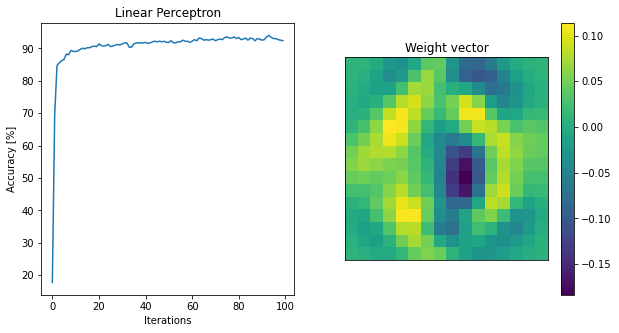

In [70]:
digit = 0
fname = "usps.mat"

imgs,labels = load_data(fname)
# we only want to classify one digit 
labels = sp.sign((labels[digit,:]>0)-.5)

# please think about what the next lines do
permidx = sp.random.permutation(sp.arange(imgs.shape[-1])) #(2007, )
trainpercent = 70.
stopat = sp.floor(labels.shape[-1]*trainpercent/100.)
stopat= int(stopat)

# cut segment data into train and test set into two non-overlapping sets:
X_full = imgs[:, permidx]
X = X_full[:, 0:stopat]
Xtest = X_full[:, stopat:2007]

Y_full = labels[permidx]
Y = Y_full[0:stopat] 
Ytest = Y_full[stopat:2007]
#check that shapes of X and Y make sense..
print(X.shape) # (256, 1404)
print(Xtest.shape) # (256, 603)
print(Y.shape) # (1404,)
print(Ytest.shape) # (603,)
# it might makes sense to print them

w,acc_perceptron = perceptron_train(X,Y,Xtest,Ytest)

fig = pl.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,2,1)
ax1.plot(acc_perceptron*100.)
pl.xlabel('Iterations')
pl.title('Linear Perceptron')
pl.ylabel('Accuracy [%]')

# and imshow the weight vector
ax2 = fig.add_subplot(1,2,2)
# reshape weight vector
weights = sp.reshape(w,(int(sp.sqrt(imgs.shape[0])),int(sp.sqrt(imgs.shape[0]))))
# plot the weight image
imgh = ax2.imshow(weights)
# with colorbar
pl.colorbar(imgh)
ax2.set_title('Weight vector')
# remove axis ticks
pl.xticks(())
pl.yticks(())
# remove axis ticks
pl.xticks(())
pl.yticks(())

# write the picture to pdf
fname = 'Perceptron_digits-%d.pdf'%digit
pl.savefig(fname)



My chernovik

In [63]:
# blah = ((0.1/1) * X[:, 5] * Y[5])
# blah.shape

# rand_w = np.random.randint(1, size = (256, ))
# dummy_pred = np.dot(rand_w.transpose(), Xtest)
# print(dummy_pred.shape)
# print(Ytest.size)

w = np.full((256, ), 1/256)
#print(w)
w2 = np.random.randint(1, size = (256, ))
# print(w2.shape)


prd = np.dot(w.transpose(), X)
print(prd.shape)
wrong_temp = np.sign(prd) != Y
print(wrong_temp)
print(np.sign(prd))
print(Y)
wrong = np.where(wrong_temp == 1)[0]
#print(wrong)
print(wrong.shape[0])
if wrong.shape[0] > 0:
    # pick a random misclassified data point
    rit = np.random.choice(wrong)
    # update weight vector
    print(Y[rit])
    print(w.shape)
    w += np.dot((0.1/1), np.dot(X[:, rit], Y[rit]))
    #print(w)
    #compute error
    test_pred = np.dot(w.transpose(), Xtest) # (603, )
    correctAndNotCorrect = np.sign(test_pred) == Ytest
    totalCorrect = np.sum(correctAndNotCorrect)
    acc = totalCorrect/Ytest.size
    print(acc)

(1404,)
[False  True False ... False False False]
[-1. -1. -1. ... -1. -1. -1.]
[-1.  1. -1. ... -1. -1. -1.]
230
1.0
(256,)
0.19071310116086235


In [43]:
weights = np.random.randint(1, size = (256, )) # it should add up to 256 (1/256, 1/256, etc.)
# loop over iterations    
prediction = np.dot(weights.transpose(), X)
# print(prediction.shape)
# indices of misclassified data
wrong = np.sign(prediction) != Y
a = np.array([1, -1, 1])
print(a.shape)
print(np.where(a == 1)[0])
print(wrong.shape)
# wrong = np.where(wrong == 1)[0]
# print(wrong)

(3,)
[0 2]
(1404,)
